In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import beta
from scipy.integrate import quad

import matplotlib as mpl
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Nimbus Sans'
mpl.rcParams['font.weight'] = 'light'


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-3uywupwy because the default path (/home/janko/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


(0.9543263486534624, 2.9833356011964394e-14)


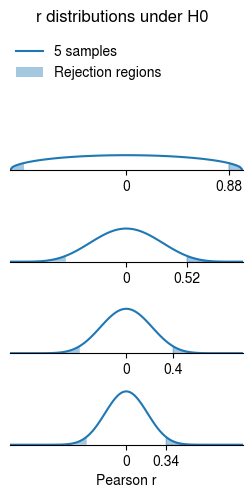

In [28]:
def f(r,n):
    return (1-r**2)**(n/2-2)/(beta(0.5,n/2-1))

def integrand(x,n):
    return f(x,n)

def bilat_integrate(a,n):
    I = quad(integrand, -a,a,args=(n))
    return I

print(bilat_integrate(0.34,35))


x = np.linspace(-1,1,100)

fig, axs = plt.subplots(4,1,figsize=(3,5), dpi=100)
fig.subplots_adjust(hspace=0.3, top=0.8)

crit_r = [0.88, 0.52, 0.4, 0.34]

for ax, n, cr in zip(axs.flatten(), [5,15,25,35], crit_r):
    
    x_lfill = np.linspace(-1,-cr, 100)
    x_rfill = np.linspace(cr,1, 100)

    y = f(x, n)
    y_lfill = f(x_lfill, n)
    y_rfill = f(x_rfill, n)

    ax.plot(x,y, label=f'{n} samples')
    ax.fill_between(x_lfill, 0, y_lfill, alpha=0.4, label='Rejection regions')
    ax.fill_between(x_rfill, 0, y_rfill, alpha=0.4, color='tab:blue')

    ax.set_yticks([])
    ax.set_ylim(0,3)
    ax.set_xlim(-1,1)

    # ax.set_title(f'{n} samples');
    # ax.set_xlabel('Pearson r')
    # ax.set_ylabel('pdf')
    ax.set_xticks([0,cr], [0, cr])

    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # ax.set_title(f'{n} samples', loc='left')


axs[-1].set_xlabel('Pearson r')
fig.suptitle('r distributions under H0')
# axs[-1].text(-1.4, 0,'Distribution under H0', rotation=90)
axs[0].legend(frameon=False, loc=[0,1.2])

In [3]:
def X_given_Y(X, Y, y, eps):
    idxes = np.where((Y>y-eps) & (Y<y+eps))
    return X[idxes]

def nice_plot(X,Y):
    ys = [2.3,0.5,-1.,-2]
    cs = ['#720026', '#ce4257', '#ff7f51','#ee9b00']

    fig = plt.figure(figsize=(6,2.5), dpi=200)
    gs = fig.add_gridspec(4,2)

    axl = fig.add_subplot(gs[:,0])
    axl.scatter(X,Y, alpha=0.1, s=1, c='gray')
    axl.set_xlabel('x')
    axl.set_ylabel('y')
    axl.set_xticks([])
    axl.set_yticks(ys)
    axl.set_yticklabels(ys, fontsize=7)
    axl.set_xlim(-4,4)
    axl.set_ylim(-4,4)
    axl.set_aspect('equal')



    for row, (c, y) in enumerate(zip(cs, ys)):

        x_given_y = X_given_Y(X,Y,y,0.1)
        y_given_y = X_given_Y(Y,Y,y,0.1)

        ax = fig.add_subplot(gs[row, 1])
        ax.hist(x_given_y, bins=20, color=c, label=f'p(X|Y={y})', alpha=0.6)
        ax.hist(x_given_y, bins=20, color=c, histtype='step')
        axl.scatter(x_given_y, y_given_y, c=c, s=1, alpha=0.2)

        ax.set_xlim(-4,4)
        ax.set_xticks([])
        ax.set_yticks([])

        for name, sp in ax.spines.items():
            if name != 'bottom': sp.set_visible(False)
            
        ax.legend(loc='upper left', frameon=False, fontsize=6)

    ax.set_xlabel('x');

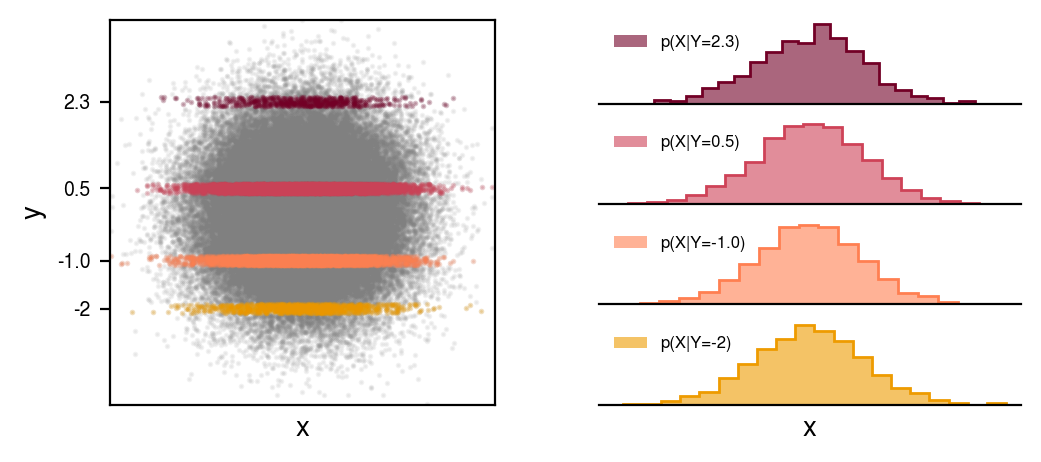

In [27]:
X = np.random.randn(100000)
Y = np.random.randn(100000)

nice_plot(X,Y)

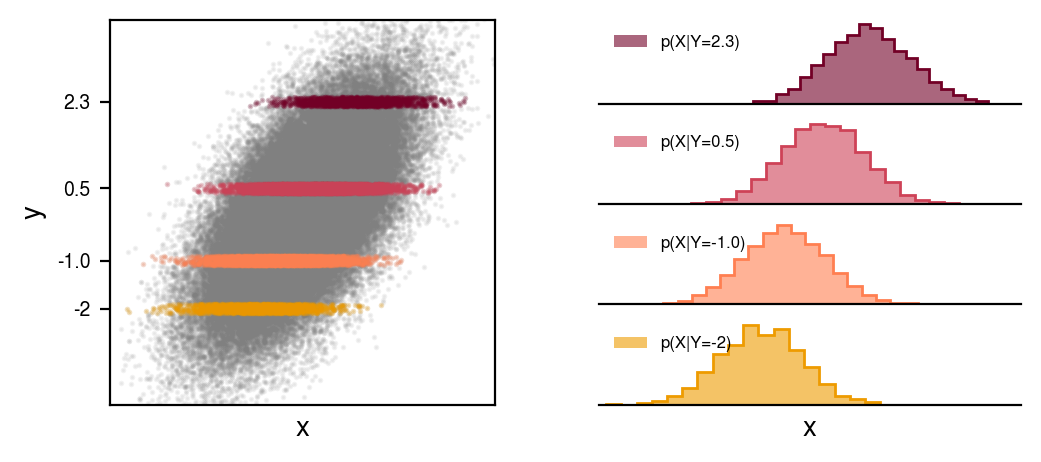

In [26]:
X = np.random.randn(100000)
Y = 0.8*X + np.random.randn(100000)

nice_plot(X,Y)

Text(0.5, 0.98, 'Interpreting $\\bar{s}$')

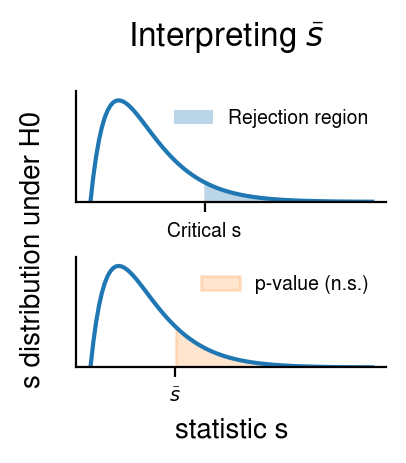

In [25]:
fig, axs = plt.subplots(2,1, figsize=(2,2), dpi=200)
fig.subplots_adjust(hspace=0.5, top=0.8)

X = np.linspace(0,10,100)
Y = X*np.exp(-X)

ax = axs[0]
ax.plot(X,Y)
ax.fill_between(X[-60:], 0, Y[-60:], alpha=0.3, label='Rejection region')
ax.legend(frameon=False, loc='upper right', fontsize=7)


ax.set_ylim(0,0.4)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ymargin(0)
ax.set_xticks([4.05], ['Critical s'], fontsize=7);
ax.set_yticks([]);

ax = axs[1]
ax.plot(X,Y)
ax.fill_between(X[-70:], 0, Y[-70:], 
                alpha=0.2, color='tab:orange', label='p-value (n.s.)')

ax.legend(frameon=False, loc='upper right', fontsize=7)

ax.set_ylim(0,0.4)
ax.set_ymargin(0)
ax.set_xlabel('statistic s')
ax.set_xticks([3], [r'$\bar{s}$'], fontsize=7);
ax.set_xlabel('statistic s')
ax.set_yticks([]);

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.text(-2.5,-0.05,'s distribution under H0', rotation=90)

fig.suptitle(r'Interpreting $\bar{s}$')

In [7]:
pip install xicorpy

Note: you may need to restart the kernel to use updated packages.


In [8]:
import xicorpy as xi

Text(0, 0.5, '$sin(X)+ \\mathcal{N}(0,\\sigma)$')

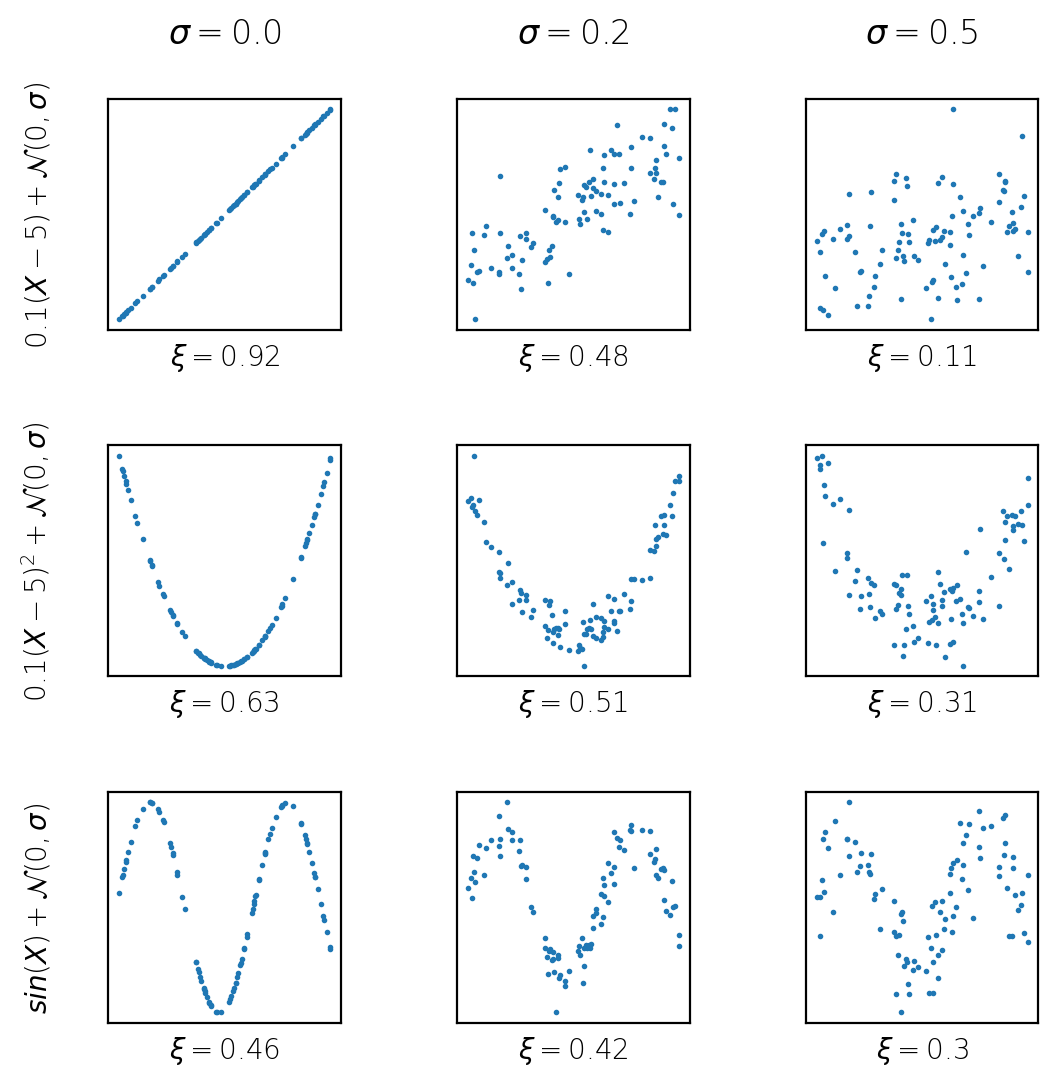

In [24]:
X = np.random.uniform(size=(100))*10

fig, axs = plt.subplots(3,3,figsize=(6,6), sharex=True, dpi=200)
fig.subplots_adjust(wspace=0.5, hspace=0.5)

for ax, sigma in zip(axs[0], [0.0,0.2,0.5]):

    Y = 0.1*X + np.random.randn(100)*sigma

    xicorr, pvalue = xi.compute_xi_correlation(X,Y, get_p_values=True)
        
    ax.scatter(X,Y, s=1)

    ax.set_title(r'$\sigma={}$'.format(sigma), pad=20)
    ax.set_xlabel(r'$\xi={:.2}$'.format(xicorr.item(),pvalue.item()))
    ax.set_yticks([])

for ax, sigma in zip(axs[1], [0.0,0.2,0.5]):

    Y = 0.1*(X-5)**2 + np.random.randn(100)*sigma
    xicorr, pvalue = xi.compute_xi_correlation(X,Y, get_p_values=True)
        
    ax.scatter(X,Y, s=1)
    ax.set_xlabel(r'$\xi={:.2}$'.format(xicorr.item(),pvalue.item()))
    ax.set_yticks([])

for ax, sigma in zip(axs[2], [0.0,0.2,0.5]):

    Y = np.sin(X) + np.random.randn(100)*sigma
    xicorr, pvalue = xi.compute_xi_correlation(X,Y, get_p_values=True)
        
    ax.scatter(X,Y, s=1)
    ax.set_xlabel(r'$\xi={:.2}$'.format(xicorr.item(),pvalue.item()))
    ax.set_xticks([])
    ax.set_yticks([])

axs[0,0].set_ylabel(r'$0.1(X-5)+ \mathcal{N}(0,\sigma)$', labelpad=20)
axs[1,0].set_ylabel(r'$0.1(X-5)^2+ \mathcal{N}(0,\sigma)$', labelpad=20)
axs[2,0].set_ylabel(r'$sin(X)+ \mathcal{N}(0,\sigma)$', labelpad=20)


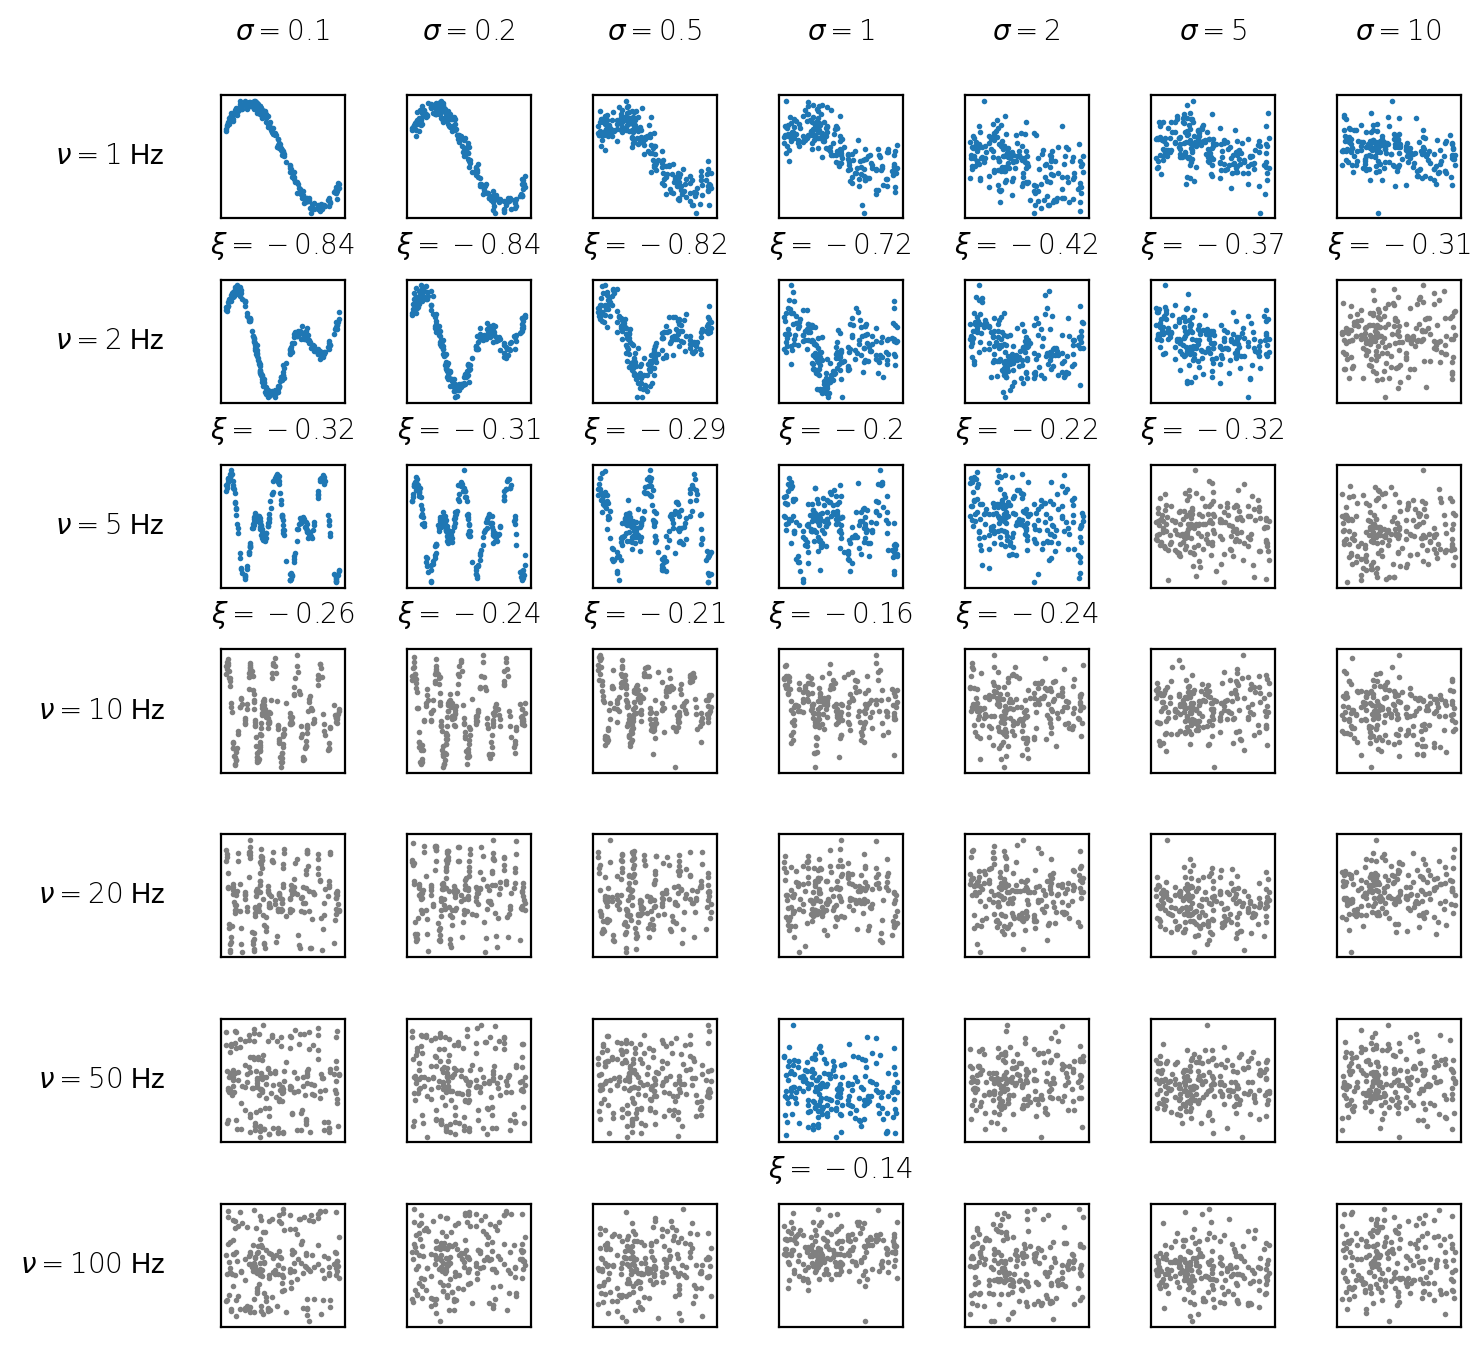

In [23]:
from itertools import product
from scipy.special import erf
from scipy.stats import pearsonr, spearmanr

n_points = 201

X = np.linspace(0,1,n_points)
X = np.random.uniform(0,1,size=(n_points))
# Y = np.sin(X*2*np.pi*1) + np.cos(X)

nrs = [0.1,0.2,0.5,1,2,5,10]
frs = [1,2,5,10,20,50,100]

fig, axs = plt.subplots(len(frs), len(nrs), figsize=(8,8), dpi=200)
fig.subplots_adjust(wspace=0.5, hspace=0.5)

for (i, fr), (j, nr) in product(enumerate(frs), enumerate(nrs)):
    Y = np.sin(X*2*np.pi*fr) + np.cos(X*np.pi*fr) + np.random.randn(n_points)*nr
    xicorr, pvalue = xi.compute_xi_correlation(X,Y, get_p_values=True)

    xicorr, pvalue = spearmanr(X,Y)

    stat = xicorr.item()*np.sqrt(n_points)*5/2
    test = 0.5 - erf(stat)
    
    ax = axs[i,j]
    ax.scatter(X,Y, s=1, c='gray' if pvalue>0.05 else 'tab:blue')
    ax.set_xticks([])
    ax.set_yticks([])
    if pvalue < 0.05: ax.set_xlabel(r'$\xi = {:.2}$'.format(xicorr.item()))

for ax, fr in zip(axs.T[0], frs):
    ax.set_ylabel(r'$\nu = {}$ Hz'.format(fr), rotation=0, ha='right', va='center', labelpad=20)

for ax, nr in zip(axs[0], nrs):
    ax.set_title(r'$\sigma = {}$'.format(nr), weight='normal', fontsize=10, pad=20)



Sample H0

In [11]:
from itertools import product
from multiprocessing import Pool

def f(Z):
    return xi.compute_xi_correlation(*Z)

n_mc = 1000
n_points = [200,400,1000,10000]
xi_dists = []

for n in n_points:

    X = np.tile(np.linspace(0,1,n), (n_mc,1))
    Y = np.random.randn(n_mc, n)

    Z = [z for z in zip(X,Y)]

    with Pool(16) as p:
        xis = p.map(f, Z)

    xi_dists.append(np.array(xis).squeeze())




In [12]:
h0_samples = np.stack(xi_dists, axis=0)

Text(0.5, 0.98, '$\\xi$ sampling under H0')

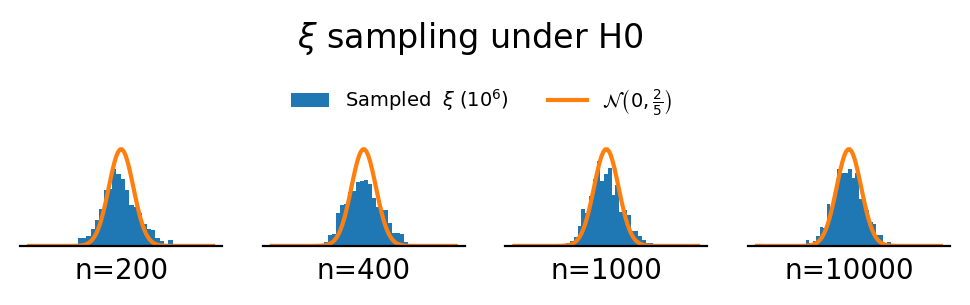

In [13]:
from scipy.stats import norm

fig, axs = plt.subplots(1,4, figsize=(6,1.3), dpi=200, sharey=True, sharex=True)
fig.subplots_adjust(top=0.5)

x_plot = np.linspace(-3,3,100)

for n, ax, xi_dist in zip(n_points, axs, xi_dists):
    ax.hist(np.sqrt(n)*xi_dist*5/2, density=True, bins=30, label=r'Sampled  $\xi \; (10^6)$')
    ax.plot(x_plot, norm.pdf(x_plot, scale=2/5), label=r'$\mathcal{N}\left(0,\frac{2}{5}\right)$')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(f'n={n}')

    for name, spine in ax.spines.items():
        if name != 'bottom': spine.set_visible(False)

ax.legend(loc=(-2.3,1.2),frameon=False, ncols=2, fontsize=7)


fig.suptitle(r'$\xi$ sampling under H0')

In [14]:
alt_xi_dists = []

for n in n_points:

    X = np.tile(np.linspace(0,1,n), (n_mc,1))
    Y = np.sin(X*2*np.pi*10) + np.cos(X*np.pi*10) + np.random.randn(n_mc, n)*5

    Z = [z for z in zip(X,Y)]

    with Pool(24) as p:
        xis = p.map(f, Z)

    alt_xi_dists.append(np.array(xis).squeeze())

alt_samples = np.stack(alt_xi_dists, axis=0)

In [15]:

n_points = [201,400,1000,10000]

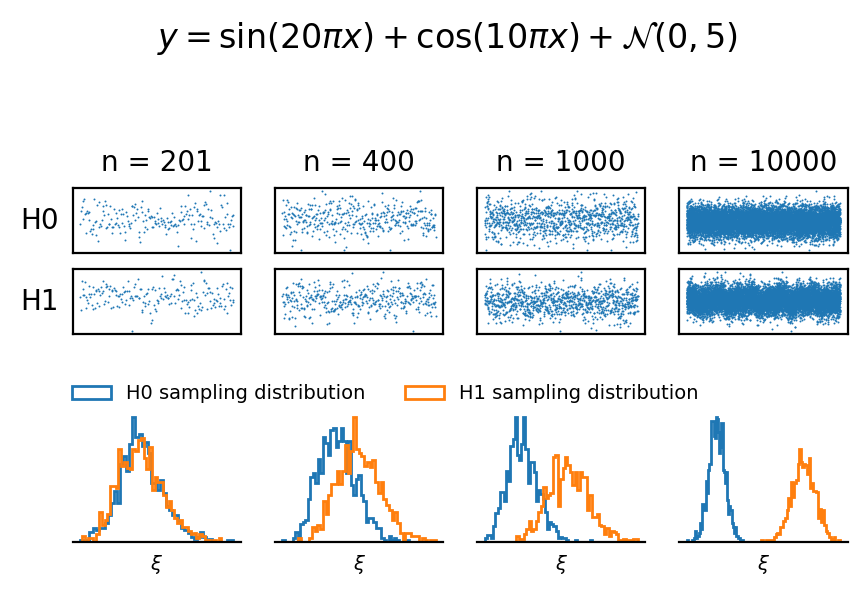

In [16]:
fig, axs = plt.subplots(4,4, height_ratios=(1,1,0.7, 2), figsize=(5,3), dpi=200)
fig.subplots_adjust(top=0.7)


for n, col, h0, alt in zip(n_points, axs.T, h0_samples, alt_samples):

    X = np.linspace(0,1,n)
    alt_Y = np.sin(X*2*np.pi*10) + np.cos(X*np.pi*10) + np.random.randn(n)*5
    h0_Y = np.random.randn(n)

    ax=col[0]
    ax.scatter(X,h0_Y, linewidths=0, s=0.5)
    ax.set_title(f'n = {n}', fontsize=10)    

    ax=col[1]
    ax.scatter(X,alt_Y, linewidths=0, s=0.5)

    for spine in col[2].spines.values(): spine.set_visible(False)

    ax=col[3]
    ax.hist(h0, histtype='step', density=True, bins=50, label='H0 sampling distribution')
    ax.hist(alt, histtype='step', density=True, bins=50, label='H1 sampling distribution')

    ax.set_xlabel(r'$\xi$', fontsize=7)
    
    for name, spine in ax.spines.items():
        if name != 'bottom': spine.set_visible(False)

    # ax.set_xlim(-0.1,0.1)
    # ax.set_ylim(0,200)

ax.legend(loc=(-3.65,1), ncol=2, frameon=False, fontsize=7)

for ax in axs.flatten():
    ax.set_xticks([])
    ax.set_yticks([])

axs[0,0].set_ylabel('H0', rotation=0, ha='center', va='center', labelpad=12)
axs[1,0].set_ylabel('H1', rotation=0, ha='center', va='center', labelpad=12)

fig.suptitle(r'$y = \sin(20\pi x) + \cos(10\pi x) + \mathcal{N}(0,5)$');

In [17]:
n_points = [201,400,1000,10000]
alt_xi_dists = []

for n in n_points:

    X = np.tile(np.linspace(0,1,n), (n_mc,1))
    Y = np.sin(X*2*np.pi*100) + np.cos(X*np.pi*100) + np.random.randn(n_mc, n)*10

    Z = [z for z in zip(X,Y)]

    with Pool(24) as p:
        xis = p.map(f, Z)

    alt_xi_dists.append(np.array(xis).squeeze())

alt_samples = np.stack(alt_xi_dists, axis=0)

Text(0.5, 0.98, '$y = \\sin(20\\pi x) + \\cos(10\\pi x) + \\mathcal{N}(0,5)$')

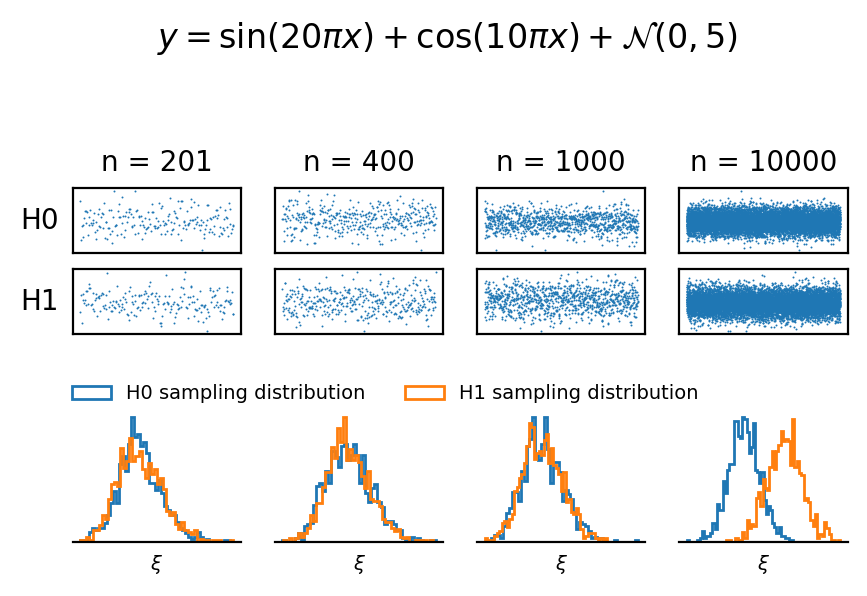

In [18]:
fig, axs = plt.subplots(4,4, height_ratios=(1,1,0.7, 2), figsize=(5,3), dpi=200)
fig.subplots_adjust(top=0.7)


for n, col, h0, alt in zip(n_points, axs.T, h0_samples, alt_samples):

    X = np.linspace(0,1,n)
    alt_Y = np.sin(X*2*np.pi*100) + np.cos(X*np.pi*100) + np.random.randn(n)*10
    h0_Y = np.random.randn(n)

    ax=col[0]
    ax.scatter(X,h0_Y, linewidths=0, s=0.5)
    ax.set_title(f'n = {n}', fontsize=10)    

    ax=col[1]
    ax.scatter(X,alt_Y, linewidths=0, s=0.5)

    for spine in col[2].spines.values(): spine.set_visible(False)

    ax=col[3]
    ax.hist(h0, histtype='step', density=True, bins=50, label='H0 sampling distribution')
    ax.hist(alt, histtype='step', density=True, bins=50, label='H1 sampling distribution')

    ax.set_xlabel(r'$\xi$', fontsize=7)
    
    for name, spine in ax.spines.items():
        if name != 'bottom': spine.set_visible(False)

    # ax.set_xlim(-0.1,0.1)
    # ax.set_ylim(0,200)

ax.legend(loc=(-3.65,1), ncol=2, frameon=False, fontsize=7)

for ax in axs.flatten():
    ax.set_xticks([])
    ax.set_yticks([])

axs[0,0].set_ylabel('H0', rotation=0, ha='center', va='center', labelpad=12)
axs[1,0].set_ylabel('H1', rotation=0, ha='center', va='center', labelpad=12)

fig.suptitle(r'$y = \sin(20\pi x) + \cos(10\pi x) + \mathcal{N}(0,5)$')

### Coxi stuff

In [19]:
def coxi(data):
    coxi = np.identity(len(data))
    for i in range(len(data)-1):
        for j in range(i+1, len(data)):
            X = data[i]
            Y = data[j]
            xicorr1 = xi.compute_xi_correlation(X,Y)
            xicorr2 = xi.compute_xi_correlation(Y,X)
            xicorr = max(xicorr1, xicorr2)
            coxi[i, j] = xicorr
            coxi[j, i] = xicorr

    return coxi

Text(0.5, 0, 'XiCA Components')

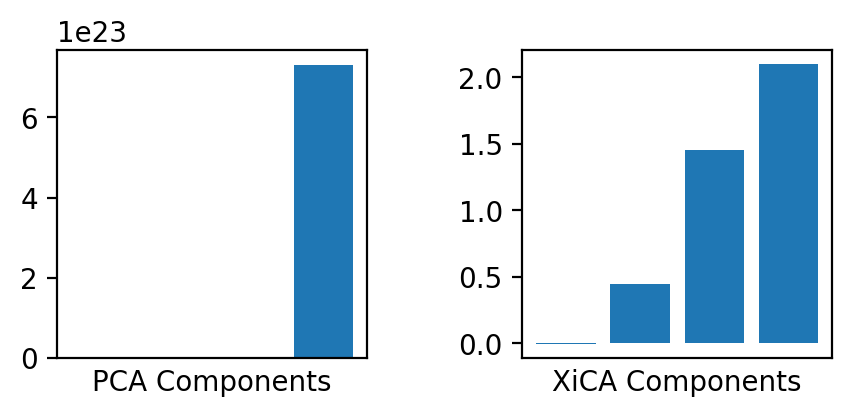

In [20]:
n_points = 2000
sigma = 0

X = np.random.randn(n_points)

# Y = np.sin(10*X) + np.random.randn(n_points)*sigma
Y = np.random.randn(n_points)
Z = Y*1/(1+X)**3 + np.random.randn(n_points)*sigma
W = Y**2 + np.random.randn(n_points)*sigma

data = np.stack([X,Y,Z,W])

# Using the PCA
cov = np.cov(data)
eigvalpca, eigvecpca = np.linalg.eigh(cov)

# Using the XCA (whatever)
cox = coxi(data)
eigvalxca, eigvecxca = np.linalg.eigh(cox)

fig, axs = plt.subplots(1,2,figsize=(5,2), dpi=200)
fig.subplots_adjust(wspace=0.5)

ax = axs[0]
ax.bar(range(len(eigvalpca)), eigvalpca)
ax.set_xticks([])
ax.set_xlabel('PCA Components')

ax = axs[1]
ax.bar(range(len(eigvalxca)), eigvalxca)
ax.set_xticks([])
ax.set_xlabel(r'XiCA Components')


In [21]:
x = np.linspace(0,10000,100000)

y = np.sin(x)
z = np.sin(200*x)

np.var(z)


0.49999825568044776